In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/3shapesdatasetunk/All Data/1/170.jpg
/kaggle/input/3shapesdatasetunk/All Data/1/133.png
/kaggle/input/3shapesdatasetunk/All Data/1/438.jpg
/kaggle/input/3shapesdatasetunk/All Data/1/397.png
/kaggle/input/3shapesdatasetunk/All Data/1/466.png
/kaggle/input/3shapesdatasetunk/All Data/1/264 (2).jpg
/kaggle/input/3shapesdatasetunk/All Data/1/499.png
/kaggle/input/3shapesdatasetunk/All Data/1/223.png
/kaggle/input/3shapesdatasetunk/All Data/1/249 (2).jpg
/kaggle/input/3shapesdatasetunk/All Data/1/234.jpg
/kaggle/input/3shapesdatasetunk/All Data/1/332 (2).jpg
/kaggle/input/3shapesdatasetunk/All Data/1/176 (2).jpg
/kaggle/input/3shapesdatasetunk/All Data/1/458.jpg
/kaggle/input/3shapesdatasetunk/All Data/1/283 (2).jpg
/kaggle/input/3shapesdatasetunk/All Data/1/34.png
/kaggle/input/3shapesdatasetunk/All Data/1/510.jpg
/kaggle/input/3shapesdatasetunk/All Data/1/313.png
/kaggle/input/3shapesdatasetunk/All Data/1/120.png
/kaggle/input/3shapesdatasetunk/All Data/1/482.png
/kaggle/inpu

In [2]:
%matplotlib inline


In [3]:
from IPython.display import Image 
pil_img = Image(filename='/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/C/s/color_18_0100.png')

display(pil_img)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/C/s/color_18_0100.png'

In [4]:
/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/C/a/color_0_0002.png

NameError: name 'kaggle' is not defined

In [5]:
# from PIL import Image  
  
# # Opens a image in RGB mode  
# im = Image.open('/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/B/t/color_19_0014.png')  
  
# # Size of the image in pixels (size of orginal image)  
# # (This is not mandatory)  
# newsize = (300, 300) 
# im1 = im1.resize(newsize) 
# # Shows the image in image viewer  
# im1.show()  

In [6]:
# import cv2
# im1 =cv2.imread('/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/C/a/color_0_0002.png',0)
# im2 = cv2.resize(im1,(64,64))
# cv2.imwrite('test1.png',im2)
# pil_img = Image(filename='test1.png')

# display(pil_img)

In [7]:
#TO_DO
#1 prepare the X_train , X_test 

import os

path, dirs, files = next(os.walk("/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/A/b"))
file_count = len(files)

file_count

StopIteration: 

In [8]:
for filename in glob.glob(os.path.join(directory_a, '*.png')):
    im1 =cv2.imread(filename,0)
    print(im1.shape)

NameError: name 'glob' is not defined

In [9]:
from skimage.feature import hog
def giveMeFeatures(image):
    res = hog(image, orientations=8, pixels_per_cell=(16,16),cells_per_block=(4, 4),block_norm= 'L2')
#     =  hog(img, orientations=9, pixels_per_cell=(6, 6),cells_per_block=(2, 2),block_norm='L1', visualize=False,transform_sqrt=False,feature_vector=True)
    return res


    


In [10]:
import glob
import cv2
directory_a = '/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/A/a'
directory_b = '/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/A/b'

X = []
y = []

for filename in glob.glob(os.path.join(directory_a, '*.png')):
    im1 =cv2.imread(filename,0)
    im1 = cv2.resize(im1,(64,64))
    features = giveMeFeatures(im1)
    X.append(features)
    y.append(0)

for filename in glob.glob(os.path.join(directory_b, '*.png')):
    im1 =cv2.imread(filename,0)
    im1 = cv2.resize(im1,(64,64))
    features = giveMeFeatures(im1)
    X.append(features)
    y.append(1)
    
X = np.array(np.float32(X))
y = np.array(np.float32(y))


rand = np.random.RandomState(321)
shuffle = rand.permutation(len(X))
X = X[shuffle]
y = y[shuffle]
    
    


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

ValueError: With n_samples=0, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [12]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [2,3,4,5,6,7,8,9,10,11,12], 
          'kernel': ['rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)


NameError: name 'X_train' is not defined

In [13]:
from sklearn.metrics import classification_report,accuracy_score
classification_report(y_test, prediction)

NameError: name 'y_test' is not defined

In [14]:
print("Accuracy: "+str(accuracy_score(y_test, prediction)))
# model1.score(X_test,y_test)

NameError: name 'y_test' is not defined

In [15]:
def testModel(path):
    im1 =cv2.imread(path,0)
    im1 = cv2.resize(im1,(64,64))
    features=[]
    features.append(giveMeFeatures(im1))
    features = np.array(np.float32(features))    
    res =model1.predict(features)
    if(res[0]==0):
        return 'fist'
    else:
        return 'palm'
        
    return 
    

In [16]:
testModel('/kaggle/input/testdata2/palm2.jpg')

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [17]:
testModel('/kaggle/input/testdata2/palm1.jpg')

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import cv2 as cv

from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
from keras.optimizers import Adam,RMSprop 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import pickle

%matplotlib inline

Using TensorFlow backend.


In [19]:
model = models.Sequential()

In [20]:
# # Block 1
# model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
# model.add(LeakyReLU())
# model.add(Conv2D(32,3, padding  ="same"))
# model.add(LeakyReLU())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# # Block 2
# model.add(Conv2D(64,3, padding  ="same"))
# model.add(LeakyReLU())
# model.add(Conv2D(64,3, padding  ="same"))
# model.add(LeakyReLU())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(2,activation="sigmoid"))

In [21]:
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 2 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 25)          11275     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [22]:
initial_lr = 0.001
loss = "sparse_categorical_crossentropy"
model.compile(Adam(lr=initial_lr), loss=loss ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 25)          11275     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [23]:
import glob
import cv2
directory_a = '/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/A/a'
directory_b = '/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/A/b'
directory_5 = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/5'
directory_s = '/kaggle/input/asl-rgb-depth-fingerspelling-spelling-it-out/dataset5/A/s'

ADirectories = []
BDirectories = []

ADirectories.append(directory_a)
ADirectories.append(directory_s)
BDirectories.append(directory_b)
BDirectories.append(directory_5)


X = []
y = []
types = ['*.png', '*.jpg']
countA=0
countB=0
for typ in types:
    for directory in ADirectories:
        for filename in glob.glob(os.path.join(directory, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(28,28))
            X.append(im1)
            y.append([1,0])
            countA+=1
    for directory in BDirectories:
        for filename in glob.glob(os.path.join(directory, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(28,28))
            X.append(im1)
            y.append([0,1])
            countB+=1
print('A: ', countA)
print('B: ', countB)


A:  0
B:  1500


In [24]:
X = np.asarray(X)
y = np.asarray(y)

In [25]:
X=X/255

In [26]:
y.shape

(1500, 2)

In [27]:
# y = y.reshape(4527,1)
X = X.reshape(4527, 28, 28,1)

ValueError: cannot reshape array of size 1176000 into shape (4527,28,28,1)

In [28]:
y[2].shape

(2,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [31]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (1005, 28, 28)

In [32]:
epochs = 20
batch_size = 256
# history_1 = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=[X_test,y_test])
history_1 = model.fit(datagen.flow(X_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (X_test, y_test))

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (1005, 28, 28))

NameError: name 'history_1' is not defined

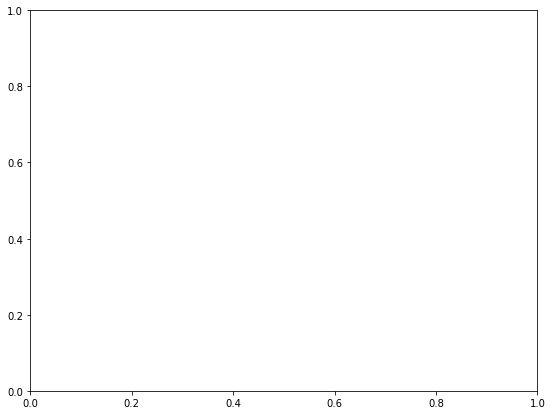

In [33]:
# Diffining Figure
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)

plt.plot(history_1.epoch,history_1.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_1.epoch,history_1.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_1.epoch,history_1.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_1.epoch,history_1.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [34]:
def testCNNModel(path,model):
    im1 =cv2.imread(path,0)
    im1 = cv2.resize(im1,(28,28))
    t = []
    t.append(im1.reshape(28,28))
    t = np.asarray(t)
    t = t.reshape(1,28,28,1)
    res =model.predict(t)
    return res
        
    return 

In [35]:
testCNNModel('/kaggle/input/testdata2/fist1.jpg',model)

array([[3.6324319e-10, 1.0000000e+00]], dtype=float32)

In [36]:
label_binarizer.transform(np.asarray([0]))

array([[0]])

# Third model 

In [37]:
import glob
import cv2
directory_5 = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/5'
directory_2 = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/2'
directory_unk = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/unknown'




X = []
y = []
types = ['*.png', '*.jpg']
for typ in types:
        for filename in glob.glob(os.path.join(directory_2, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(0)
        for filename in glob.glob(os.path.join(directory_5, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(1)
        for filename in glob.glob(os.path.join(directory_unk, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(2)
            



In [38]:
X = np.asarray(X)
y = np.asarray(y)




In [39]:
X = X.reshape(-1,64,64,1)
X.shape

(4500, 64, 64, 1)

In [40]:
IMG_SIZE=64
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle

NAME = "Numbers-CNN-Model-{}".format(str(time.ctime())) # Model Name


X = X/255.0

model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax')) # size must be equal to number of classes i.e. 11

tensorboard = TensorBoard(log_dir="/kaggle/working/logs/{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[tensorboard])

Train on 3600 samples, validate on 900 samples
Epoch 1/10
3600/3600 [==============================] - 7s 2ms/sample - loss: 0.8712 - accuracy: 0.5986 - val_loss: 1.1513 - val_accuracy: 0.4678
Epoch 2/10
3600/3600 [==============================] - 6s 2ms/sample - loss: 0.3177 - accuracy: 0.8811 - val_loss: 0.4378 - val_accuracy: 0.8133
Epoch 3/10
3600/3600 [==============================] - 6s 2ms/sample - loss: 0.1845 - accuracy: 0.9303 - val_loss: 0.5895 - val_accuracy: 0.7167
Epoch 4/10
3600/3600 [==============================] - 6s 2ms/sample - loss: 0.1197 - accuracy: 0.9583 - val_loss: 0.3687 - val_accuracy: 0.8356
Epoch 5/10
3600/3600 [==============================] - 6s 2ms/sample - loss: 0.0839 - accuracy: 0.9728 - val_loss: 0.2590 - val_accuracy: 0.8944
Epoch 6/10
3600/3600 [==============================] - 6s 2ms/sample - loss: 0.0607 - accuracy: 0.9786 - val_loss: 0.0984 - val_accuracy: 0.9667
Epoch 7/10
3600/3600 [==============================] - 6s 2ms/sample - loss:

In [41]:
def testCNNModel(path,model):
    im1 =cv2.imread(path,0)
    im1 = cv2.resize(im1,(64,64))
    t = []
    t.append(im1.reshape(64,64))
    t = np.asarray(t)
    t = t.reshape(1,64,64,1)
    res =model.predict(t)
    return res
        
    return 

In [42]:
testCNNModel('/kaggle/input/testdata2/two14.jpg',model)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


# # # Third model with our data

In [43]:
import glob
import cv2
directory_1 = '/kaggle/input/3shapesdataset/resized/1'
directory_2 = '/kaggle/input/3shapesdataset/resized/2'
directory_3 = '/kaggle/input/3shapesdataset/resized/3'
#directory_unk = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/unknown'




X = []
y = []
types = ['*.png', '*.jpg']
for typ in types:
        for filename in glob.glob(os.path.join(directory_1, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(0)
        for filename in glob.glob(os.path.join(directory_2, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(1)
        for filename in glob.glob(os.path.join(directory_3, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(2)
#         for filename in glob.glob(os.path.join(directory_unk, typ)):
#             im1 =cv2.imread(filename,0)
#             im1 = cv2.resize(im1,(64,64))
#             X.append(im1)
#             y.append(3)
            
            



In [44]:
X = np.asarray(X)
y = np.asarray(y)




In [45]:
X.shape

(0,)

In [46]:
X = X.reshape(-1,64,64,1)
X.shape

(0, 64, 64, 1)

In [47]:
IMG_SIZE=64
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle

NAME = "Numbers-CNN-Model-{}".format(str(time.ctime())) # Model Name


X = X/255.0

model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax')) # size must be equal to number of classes i.e. 11

tensorboard = TensorBoard(log_dir="/kaggle/working/logs/{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[tensorboard])

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/utils/generic_utils.py:514: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [48]:
def testCNNModel(path,model):
    im1 =cv2.imread(path,0)
    im1 = cv2.resize(im1,(64,64))
    t = []
    t.append(im1.reshape(64,64))
    t = np.asarray(t)
    t = t.reshape(1,64,64,1)
    res =model.predict(t)
    return res
        
    return 

In [49]:
testCNNModel('/kaggle/input/testdata2/fist5.jpg',model)

array([[9.9999988e-01, 1.3966761e-07, 4.4083213e-22]], dtype=float32)

In [50]:
print('asd')


asd


# # # Third model with our data (FULL)

In [51]:
import glob
import cv2
directory_1 = '/kaggle/input/3shapesdatasetunk/All Data/1'
directory_2 = '/kaggle/input/3shapesdatasetunk/All Data/2'
directory_3 = '/kaggle/input/3shapesdatasetunk/All Data/3'
# directory_4 = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/4'
# directory_5 = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/5'
directory_unk = '/kaggle/input/3shapesdatasetunk/All Data/unknown'
#directory_unk = '/kaggle/input/sign-language-for-numbers/Sign Language for Numbers/unknown'




X = []
y = []
types = ['*.png', '*.jpg']
for typ in types:
        for filename in glob.glob(os.path.join(directory_1, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(0)
        print('finished')
        for filename in glob.glob(os.path.join(directory_2, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(1)
        print('finished')
        for filename in glob.glob(os.path.join(directory_3, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(2)
        print('finished')
        for filename in glob.glob(os.path.join(directory_unk, typ)):
            im1 =cv2.imread(filename,0)
            im1 = cv2.resize(im1,(64,64))
            X.append(im1)
            y.append(3)
        print('finished')
            
            



finished
finished
finished
finished
finished
finished
finished
finished


In [52]:
X = np.asarray(X)
y = np.asarray(y)




In [53]:
X = X.reshape(-1,64,64,1)
X.shape

(6368, 64, 64, 1)

In [54]:
IMG_SIZE=64
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle

NAME = "Numbers-CNN-Model-{}".format(str(time.ctime())) # Model Name


X = X/255.0

model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax')) # size must be equal to number of classes i.e. 11

tensorboard = TensorBoard(log_dir="/kaggle/working/logs/{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[tensorboard])

Train on 5094 samples, validate on 1274 samples
Epoch 1/10
5094/5094 [==============================] - 9s 2ms/sample - loss: 1.0011 - accuracy: 0.5589 - val_loss: 2.1296 - val_accuracy: 0.0000e+00
Epoch 2/10
5094/5094 [==============================] - 8s 2ms/sample - loss: 0.4322 - accuracy: 0.8496 - val_loss: 1.7648 - val_accuracy: 0.2991
Epoch 3/10
5094/5094 [==============================] - 8s 2ms/sample - loss: 0.2462 - accuracy: 0.9203 - val_loss: 0.8081 - val_accuracy: 0.7111
Epoch 4/10
5094/5094 [==============================] - 8s 2ms/sample - loss: 0.1618 - accuracy: 0.9450 - val_loss: 1.1829 - val_accuracy: 0.5573
Epoch 5/10
5094/5094 [==============================] - 9s 2ms/sample - loss: 0.1177 - accuracy: 0.9621 - val_loss: 0.4917 - val_accuracy: 0.8438
Epoch 6/10
5094/5094 [==============================] - 9s 2ms/sample - loss: 0.0806 - accuracy: 0.9735 - val_loss: 0.5133 - val_accuracy: 0.8218
Epoch 7/10
5094/5094 [==============================] - 8s 2ms/sample - 

In [55]:
def testCNNModel(path,model):
    im1 =cv2.imread(path,0)
    im1 = cv2.resize(im1,(64,64))
    t = []
    t.append(im1.reshape(64,64))
    t = np.asarray(t)
    t = t.reshape(1,64,64,1)
    res =model.predict(t)
    return res
        
    return 

In [56]:
testCNNModel('/kaggle/input/testdata2/two4.jpg',model)

array([[0., 1., 0., 0.]], dtype=float32)